In [2]:
!pip3 install tensorflowjs
!pip3 install tensorflow-decision-forests==1.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 324.2 kB/s eta 0:00:0000:0100:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-74.1.2-py3-none-any.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This cou

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import io
from PIL import Image
import tensorflow_decision_forests as tfdf
tfdf.__version__

'1.8.1'

In [ ]:
data_train = pd.read_parquet("./Alzheimer_MRI_Disease_Classification_Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet", engine='pyarrow')
data_test = pd.read_parquet("./Alzheimer_MRI_Disease_Classification_Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet", engine='pyarrow')

In [ ]:
X_Train = [np.array(Image.open(io.BytesIO(i['bytes']))) for i in data_train.image]
X_Train = tf.Variable(X_Train, dtype=float)
Y_Train = tf.Variable(data_train.label)

X_Test = [np.array(Image.open(io.BytesIO(i['bytes']))) for i in data_test.image]
X_Test = tf.Variable(X_Test, dtype=float)
Y_Test = tf.Variable(data_test.label)

In [ ]:
X_Train = X_Train / 255.0
X_Test = X_Test / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_Train, Y_Train, epochs=5)

Epoch 1/5
160/160 [==============================] - 131s 807ms/step - loss: 0.9680 - accuracy: 0.5479
Epoch 2/5
160/160 [==============================] - 136s 846ms/step - loss: 0.6834 - accuracy: 0.7113
Epoch 3/5
160/160 [==============================] - 128s 798ms/step - loss: 0.3600 - accuracy: 0.8666
Epoch 4/5
160/160 [==============================] - 121s 756ms/step - loss: 0.1316 - accuracy: 0.9607
Epoch 5/5
160/160 [==============================] - 124s 773ms/step - loss: 0.0547 - accuracy: 0.9859


In [ ]:
model.evaluate(X_Test, Y_Test)

40/40 [==============================] - 10s 235ms/step - loss: 0.1122 - accuracy: 0.9656


[0.11220041662454605, 0.965624988079071]

In [ ]:
raw_predictions = model.predict(X_Test)
predictions = [np.argmax(i) for i in raw_predictions]

40/40 [==============================] - 10s 238ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels=Y_Test, predictions=predictions)

Text(95.72222222222221, 0.5, 'Truth')

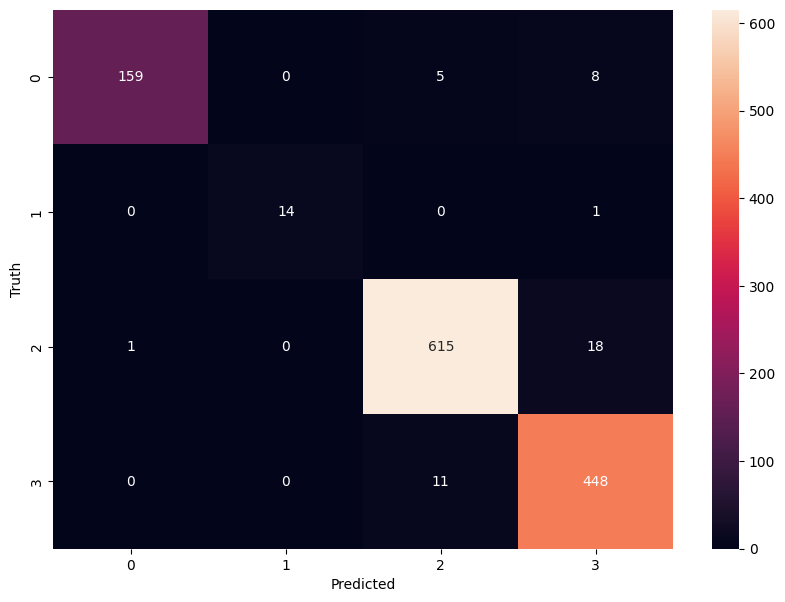

In [ ]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.save("./alzheimers_predicter_model.keras")

In [3]:
!tensorflowjs_converter --input_format=keras ./alzheimers_predicter_model.h5 ./src/model

2024-09-10 01:20:29.218303: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 01:20:29.218369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 01:20:29.220038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 01:20:30.620777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
